 #  DS 636 Midterm project: Equity Portfolio Management
 ##  Project Members
 ####                           Mallika Kasi     	    mk2434
 ####                           Lizbeth Fernandez     	lf243
 ####                           Sai Vishal Chinta     	31523943
 ####                           Ramya Balasubramanian    rb756    

 ##  Load All required Libraries

In [7]:
###Load Neccessary Libraries
library(sparklyr)
library(dplyr)
library(ggraph)
library(igraph)
library(graphframes)
library(tidyverse)
library(lubridate)
library(repr)
options(repr.plot.width = 15, repr.plot.height = 5)
options(warn=-1)


 ##  Data Preparation
 ##  Loading All 10 Stocks Dataframes as Single Merged Dataframes for year 2018

In [8]:
print("############    Midterm project: Equity Portfolio Management ###########")
###Set the Path where we have input csv files for all datasets
setwd("C:\\Users\\pravi\\OneDrive\\Desktop\\Mallika-NJIT\\DS-636-AnalyticsWithR\\Week6\\MidTerm-Project\\")
print("############ Logging Started ################")                        

###Loading Stock Dataframes as Single Merged Dataframe
    print("############")
    print(Sys.time())
    print("Loading Dataframes as Single Merged Dataframe")
    print("############")
    StockUniverse = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP')
    get_stock_dataframes = function(X){
        file_name = paste0(X, ".csv")
        DataFile = read.csv(file_name)
        stock_All_Price_data = DataFile %>% select(Date,   Close,  Adj.Close)
        return(stock_All_Price_data)
    }
    
    ### Calling get_stock_dataframes function to Fetch Data for all 10 DataFrames using lapply and save as list
    StockUniverse_DataframeList = lapply(StockUniverse, get_stock_dataframes)
    names(StockUniverse_DataframeList) = StockUniverse
    Merged_ALL_Stock_Datas = Reduce(function(x, y) merge(x, y, by = "Date", all = TRUE), StockUniverse_DataframeList)
    ColumnListNames = c("Date", paste(rep(StockUniverse, each = 2), c("Close", "Adj_Close"), sep = "_"))
    colnames(Merged_ALL_Stock_Datas) = ColumnListNames
    head(Merged_ALL_Stock_Datas) 

[1] "############    Midterm project: Equity Portfolio Management ###########"
[1] "############ Logging Started ################"
[1] "############"
[1] "2024-07-08 22:05:20 EDT"
[1] "Loading Dataframes as Single Merged Dataframe"
[1] "############"


,Date,IBM_Close,IBM_Adj_Close,MSFT_Close,MSFT_Adj_Close,GOOG_Close,GOOG_Adj_Close,AAPL_Close,AAPL_Adj_Close,AMZN_Close,⋯,FB_Close,FB_Adj_Close,NFLX_Close,NFLX_Adj_Close,TSLA_Close,TSLA_Adj_Close,ORCL_Close,ORCL_Adj_Close,SAP_Close,SAP_Adj_Close
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,109.5477,85.95,80.08091,53.2500,53.18947,43.0650,40.67097,59.4505,⋯,181.42,181.0479,201.07,201.07,21.36867,21.36867,46.63,41.98375,112.39,101.2103
2,2018-01-03,151.5201,112.5590,86.35,80.45360,54.1240,54.06248,43.0575,40.66389,60.2100,⋯,184.67,184.2913,205.05,205.05,21.15000,21.15000,47.71,42.95613,113.31,102.0388
3,2018-01-04,154.5889,114.8386,87.11,81.16171,54.3200,54.25825,43.2575,40.85279,60.4795,⋯,184.33,183.9520,205.63,205.63,20.97467,20.97467,48.18,43.37931,115.05,103.6057
4,2018-01-05,155.3442,115.3997,88.19,82.16798,55.1115,55.04886,43.7500,41.31790,61.4570,⋯,186.85,186.4668,209.99,209.99,21.10533,21.10533,48.47,43.64042,116.33,104.7584
5,2018-01-08,156.2811,116.0957,88.28,82.25181,55.3470,55.28409,43.5875,41.16444,62.3435,⋯,188.28,187.8939,212.05,212.05,22.42733,22.42733,48.98,44.09959,114.80,103.3806
6,2018-01-09,156.6252,116.3514,88.22,82.19592,55.3130,55.25013,43.5825,41.15971,62.6350,⋯,187.87,187.4847,209.31,209.31,22.24600,22.24600,49.06,44.34365,114.16,102.8042


 ##  Loading 2018 Holidays and  USD2JPY FX details
 #### After some data exploratory found FED closed on Dec 5th


In [9]:
### Define holidays and Load USD2JPY FX details
    print("#################")
    print(Sys.time())
    print("Loading holidays and Load USD2JPY FX details as Separate Dataframes")  
    print("#################")    
                                    
    holidays <- as.Date(c("2018-01-01", "2018-01-15", "2018-02-19", "2018-03-30", "2018-05-28","2018-07-04", "2018-09-03", "2018-11-22", "2018-12-25" ,"2018-12-05"))
    USDJPY = read.csv("jpy_conversion.csv")
    USDJPY_FX = USDJPY %>% filter(!(Date %in% holidays)) %>% select(Date,Close)
    head(holidays)
    head(USDJPY_FX)

[1] "#################"
[1] "2024-07-08 22:05:25 EDT"
[1] "Loading holidays and Load USD2JPY FX details as Separate Dataframes"
[1] "#################"


[1] "2018-01-01" "2018-01-15" "2018-02-19" "2018-03-30" "2018-05-28"
[6] "2018-07-04"

,Date,Close
,<chr>,<dbl>
1,2018-01-02,112.770
2,2018-01-03,112.244
3,2018-01-04,112.607
4,2018-01-05,112.783
5,2018-01-08,113.154
6,2018-01-09,113.141


 ##  Function To calculate and Load Dividend Details for all 10 stocks

In [10]:
###Function To Load Dividend Details
    print("#################")
    print(Sys.time())
    print("Loading Dividend Details in a Dataframe")  
    print("#################") 
    ###Function to Find Dividend Day and Amount
    Find_Dividend_Date = function(X){
        DataFile = StockUniverse_DataframeList[[X]]
        X1 = mutate(DataFile,CloseLag=lag(Close),AdjCloseLag=lag(Adj.Close),CloseRatio=CloseLag/Close,
                    AdjCloseRatio=AdjCloseLag/Adj.Close ,Dividend=round((CloseRatio-AdjCloseRatio) * Close , 3),StockName=X)
        X2 = select(X1,Date,Close,CloseLag,CloseRatio,Adj.Close,AdjCloseLag,AdjCloseRatio,Dividend,StockName)
        X3 = filter(X2,Dividend >0 )
        X4 = select(X3,StockName=StockName, "DividendDay"=Date,"DividendAmount"=Dividend)
        if(nrow(X3) > 0)
        {
            return(X4)
        }
    }
    ###Step to Find Dividend Day and Amount for All 10 Stocks and Store in All_Dividend_Details Dataframe
    Merged_DF = data.frame;
    dividends_list = sapply(StockUniverse, Find_Dividend_Date)
    All_Dividend_Details = Reduce(function(x, y) rbind(x, y), dividends_list)
    All_Dividend_Details = All_Dividend_Details[order(All_Dividend_Details$DividendDay), ]                    
    head(All_Dividend_Details)


[1] "#################"
[1] "2024-07-08 22:05:31 EDT"
[1] "Loading Dividend Details in a Dataframe"
[1] "#################"


,StockName,DividendDay,DividendAmount
,<chr>,<chr>,<dbl>
13,ORCL,2018-01-09,0.190
1,IBM,2018-02-08,1.434
9,AAPL,2018-02-09,0.157
5,MSFT,2018-02-14,0.420
14,ORCL,2018-04-16,0.190
2,IBM,2018-05-09,1.501


 ##  Function to Calculate Dividend Amount for stocks held on a particular Day 

In [11]:
###Function To Calculate Dividend Amount for stocks held on a particular Day 

Calculate_Dividend_Amount  = function(portfolio,Date){
    DividenDPaidAmount = 0
    tempDiv = data.frame(Div=c(0,0,0,0,0),SN= portfolio$Stock)
    ###Check If Any Dividend for this Date and stock hold this day 
    DividendP = All_Dividend_Details %>% filter(All_Dividend_Details$DividendDay == Date) %>% select(DividendAmount,DividendDay,StockName)
    if(nrow(DividendP) > 0 )
    {
        for (stock in portfolio$Stock){
            for (StockName in DividendP$StockName){
            if(stock == StockName){
                SharesCnt = portfolio %>% filter(portfolio$Stock == StockName ) %>% select(Shares)
                DP = DividendP %>% filter(DividendP$StockName == stock ) %>% select(DividendAmount)
                DividenDPaidAmount = (as.integer(SharesCnt) * DP)
                tempDiv$Div[tempDiv$SN == StockName] = DividenDPaidAmount
            }
            }
        }
    }
    return(tempDiv)
}

 ##  Function To get Rebalance Portfolio Details for Type = (Low or High) and Holding days = n

In [12]:
###Function To get Rebalance Portfolio Details for Type = (Low or High) and Holding days = n
  
Get_Rebalance_Portfolio_Details = function(rowNumber,Date,portfolio,Type,holding_days){
    if(rowNumber == 1){   ###Calculate Initial Portfolio Dataframe for Jan 02, 2018
        Total_Initial_Investment_Amount = 5000000
        Investment_Amount_PerStock =  as.numeric(Total_Initial_Investment_Amount / 5)                       
        SelectedStocks = c("IBM", "MSFT", "GOOG", "AAPL", "AMZN")
        StockDate = Date
        ClosePricePerSelectedStocks = Merged_ALL_Stock_Datas %>% filter(Date == StockDate )  %>% select(paste0(SelectedStocks, "_Close"))
        Price = as.numeric(ClosePricePerSelectedStocks)
        Shares = floor(Investment_Amount_PerStock / as.numeric(ClosePricePerSelectedStocks))
        #Invested = (Investment_Amount_PerStock / as.numeric(ClosePricePerSelectedStocks)) * as.numeric(ClosePricePerSelectedStocks)
        Invested =  as.numeric(ClosePricePerSelectedStocks) * as.numeric(Shares)
        Cash_Remaining = Investment_Amount_PerStock - Invested
        Dividend = 0
    
    }
    else if(rowNumber %% holding_days == 1 ) ###Calculate Rebalance Portfolio Dataframe for Every Nth holding Days
    {
        tempDiv = Calculate_Dividend_Amount(portfolio,Date)
        StockDate = Date
        # Get Adj Close prices for the Prev and current date and calculate Percentage Drop
        Prev_5Day_AdjPrice = Merged_ALL_Stock_Datas %>% filter(Date == portfolio$Date) %>% select(ends_with("_Adj_Close"))
        Curr_AdjPrice = Merged_ALL_Stock_Datas %>% filter(Date == StockDate) %>% select(ends_with("_Adj_Close"))
        Adj_PriceChange = (Curr_AdjPrice - Prev_5Day_AdjPrice) / Prev_5Day_AdjPrice
        if(Type == "Low") # Select 5 stocks with the highest drop and get StockNames
        {
            SelectedStocks =  colnames(Adj_PriceChange)[order(as.numeric(Adj_PriceChange), decreasing = FALSE)[1:5]]
        }
        else if (Type == "High") # Select 5 stocks with the Lowest drop and get StockNames
        {
            SelectedStocks =  colnames(Adj_PriceChange)[order(as.numeric(Adj_PriceChange), decreasing = FALSE)[6:10]]
        }
        SelectedStocks = as.character(sapply(SelectedStocks, function(x) strsplit(x, "_Adj_Close")[1][1]))
        ###Calculate the Sell Amount to split for next investment
        ###Get Current Date Close Price for Previously bought stocks multiplied with PrevSharesBought count
        ###Sum of Selling Amount and Previous Cash in Hand Plus Dividend Paid
        ### Divide this Amount by 5 to buy new selected stocks  
        ClosePricePerSelectedStocks = Merged_ALL_Stock_Datas %>% filter(Date == StockDate )  %>% select(paste0(portfolio$Stock, "_Close"))
        Total_Initial_Investment_Amount = sum(ClosePricePerSelectedStocks * portfolio$Shares) + sum(portfolio$Cash_Remaining) 
        Total_Initial_Investment_Amount  = Total_Initial_Investment_Amount + sum(as.integer(tempDiv$Div))                
        Investment_Amount_PerStock =  as.numeric(Total_Initial_Investment_Amount / 5 )                        
        ClosePricePerSelectedStocks = Merged_ALL_Stock_Datas %>% filter(Date == StockDate )  %>% select(paste0(SelectedStocks, "_Close"))
        Price = as.numeric(ClosePricePerSelectedStocks)
        Shares = floor(Investment_Amount_PerStock / as.numeric(ClosePricePerSelectedStocks))
        Invested = as.numeric(ClosePricePerSelectedStocks) * as.numeric(Shares)
        Cash_Remaining = Investment_Amount_PerStock - Invested
        Dividend = as.integer(tempDiv$Div)
    }
    else  ### For all other Days
    {
        tempDiv = Calculate_Dividend_Amount(portfolio,Date)
        StockDate = Date
        SelectedStocks = portfolio$Stock
        ClosePricePerSelectedStocks = Merged_ALL_Stock_Datas %>% filter(Date == StockDate )  %>% select(paste0(SelectedStocks, "_Close"))
        Price = as.numeric(ClosePricePerSelectedStocks)
        Shares = floor(portfolio$Shares)
        Invested = floor(portfolio$Shares) * as.numeric(ClosePricePerSelectedStocks)
        Cash_Remaining = portfolio$Cash_Remaining 
        Dividend = as.integer(tempDiv$Div)
    }
    
    Portfolio = data.frame(
    Date = StockDate,
    Stock = SelectedStocks,
    Price = Price,
    Shares = Shares,
    Invested = Invested,
    Cash_Remaining = Cash_Remaining, 
    Dividend = Dividend,
    NetWorthPerShare = Invested + Cash_Remaining + Dividend
    ) 
    #print(Portfolio)
   
    return( Portfolio)
}

##      Function to Get Portfolio Details with Rebalancing Strategy 

In [13]:
### Function to Get Portfolio Details

Get_PortfolioDetails = function(Type , holding_days) {                                             
    Portfolio_All_DataA = data.frame();
    Portfolio = data.frame();                          
    holding_days = holding_days
    for (i in seq(1, nrow(Merged_ALL_Stock_Datas)))
    {
        Date = Merged_ALL_Stock_Datas$Date[i]
        if(Type == "Low"){
            Portfolio =  Get_Rebalance_Portfolio_Details(i,Date,Portfolio,"Low" ,holding_days )
        }
        else if (Type == "High")
        {
            Portfolio =  Get_Rebalance_Portfolio_Details(i,Date,Portfolio,"High",holding_days)
        }
        Portfolio_All_DataA = rbind(Portfolio_All_DataA,Portfolio)
    }
    return(Portfolio_All_DataA)
}

##      Low and High Rebalancing Portfolio for 5 days holding period with USD and JPY Ccy and calculating High-Tech index 

In [14]:
###  Low and High Rebalancing Portfolio for 5 days holding period with USD and JPY Ccy and calculating High-Tech index
print("#################")
print(Sys.time())
print("Calculating Rebalancing Portfolio")  
print("#################")
### Rebalancing for every 5 days
LMTM =  Get_PortfolioDetails("Low",5)
HMTM =  Get_PortfolioDetails("High",5)

print("#################")
print(Sys.time())
print("Rebalancing Portfolio for 5 Days LOW strategy ")  
print("#################")

Low_MTM  = LMTM %>% group_by(Date)   %>% summarize(Low_MTM=sum(NetWorthPerShare))    %>% select (Date,Low_MTM)  
JPY_Low_MTM  =   Low_MTM %>% mutate(JPY_Low_MTM = (Low_MTM * (USDJPY_FX$Close)))  %>% select (Date,JPY_Low_MTM)
Percentage_Low_MTM =  Low_MTM %>% mutate(Percentage_L_MTM = ((Low_MTM - 5000000)/5000000) *100 ) %>% select (Date,Percentage_L_MTM)                                           
Percentage_JPY_Low_MTM =  JPY_Low_MTM %>% mutate(Percentage_JPY_L_MTM = ((JPY_Low_MTM - JPY_Low_MTM[1])/JPY_Low_MTM[1]) *100 ) %>% select (Date,Percentage_JPY_L_MTM)                                           
                                             
MTM_LOW_List = list(Low_MTM,JPY_Low_MTM,Percentage_Low_MTM,Percentage_JPY_Low_MTM)
Merged_MTM_LOW_List = Reduce(function(x, y) merge(x, y, by = "Date", all = TRUE), MTM_LOW_List)
head(Merged_MTM_LOW_List)
tail(Merged_MTM_LOW_List)                             
print("#################") 
print(Sys.time())
print("Rebalancing Data for 5 Days High strategy ")  
print("#################")
High_MTM  = HMTM %>% group_by(Date)   %>% summarize(High_MTM=sum(NetWorthPerShare))    %>% select (Date,High_MTM)   
JPY_High_MTM  =   High_MTM %>% mutate(JPY_High_MTM = (High_MTM * (USDJPY_FX$Close)))  %>% select (Date,JPY_High_MTM)
Percentage_High_MTM =  High_MTM %>% mutate(Percentage_H_MTM = ((High_MTM - 5000000)/5000000) *100 ) %>% select (Date,Percentage_H_MTM)                                           
Percentage_JPY_High_MTM =  JPY_High_MTM %>% mutate(Percentage_JPY_H_MTM = ((JPY_High_MTM - JPY_High_MTM[1])/JPY_High_MTM[1]) *100 ) %>% select (Date,Percentage_JPY_H_MTM)                                           

MTM_High_List = list(High_MTM,JPY_High_MTM,Percentage_High_MTM,Percentage_JPY_High_MTM)
Merged_MTM_HIGH_List = Reduce(function(x, y) merge(x, y, by = "Date", all = TRUE), MTM_High_List)
head(Merged_MTM_HIGH_List) 
tail(Merged_MTM_HIGH_List)
print("#################") 
print(Sys.time())
print("Calculating High Tech Index for 5 Days strategy")  
print("#################")
ClosePriceMean = Merged_ALL_Stock_Datas %>% mutate( ClosePriceMean= rowMeans(Merged_ALL_Stock_Datas[paste0(StockUniverse, "_Close")]) ) %>% select (Date,ClosePriceMean)

###High Tech Index                                             

Percentage_High_Index =  ClosePriceMean %>% mutate(Percentage_High_Index = ((ClosePriceMean - ClosePriceMean[1])/ClosePriceMean[1]) *100) %>% select (Date, Percentage_High_Index)                                            
#MTMList = list(Low_MTM,High_MTM,JPY_Low_MTM,JPY_High_MTM,Percentage_Low_MTM,Percentage_High_MTM,Percentage_JPY_Low_MTM,Percentage_JPY_High_MTM,Percentage_High_Index)
MTM_LOW_HIGH_List = list(Percentage_Low_MTM,Percentage_High_MTM,Percentage_JPY_Low_MTM,Percentage_JPY_High_MTM,Percentage_High_Index,ClosePriceMean)
Merged_L_H_MTM = Reduce(function(x, y) merge(x, y, by = "Date", all = TRUE), MTM_LOW_HIGH_List)
head(Merged_L_H_MTM , 10)
                        


[1] "#################"
[1] "2024-07-08 22:05:53 EDT"
[1] "Calculating Rebalancing Portfolio"
[1] "#################"
[1] "#################"
[1] "2024-07-08 22:06:00 EDT"
[1] "Rebalancing Portfolio for 5 Days LOW strategy "
[1] "#################"


,Date,Low_MTM,JPY_Low_MTM,Percentage_L_MTM,Percentage_JPY_L_MTM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,5000000,563849985,0.000000,0.000000
2,2018-01-03,5061154,568084205,1.223084,0.750948
3,2018-01-04,5103664,574708246,2.073270,1.925736
4,2018-01-05,5164091,582421611,3.281811,3.293718
5,2018-01-08,5187051,586935550,3.741018,4.094274
6,2018-01-09,5192835,587522554,3.856703,4.198381


,Date,Low_MTM,JPY_Low_MTM,Percentage_L_MTM,Percentage_JPY_L_MTM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
245,2018-12-20,5043321,566919756,0.866424,0.5444304
246,2018-12-21,4868770,541266063,-2.624592,-4.0053068
247,2018-12-24,4748185,527304922,-5.036304,-6.4813451
248,2018-12-26,5071274,559878738,1.425470,-0.7043091
249,2018-12-27,5089474,565980019,1.789474,0.3777661
250,2018-12-28,5091589,564428082,1.831774,0.1025267


[1] "#################"
[1] "2024-07-08 22:06:00 EDT"
[1] "Rebalancing Data for 5 Days High strategy "
[1] "#################"


,Date,High_MTM,JPY_High_MTM,Percentage_H_MTM,Percentage_JPY_H_MTM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,5000000,563849985,0.000000,0.000000
2,2018-01-03,5061154,568084205,1.223084,0.750948
3,2018-01-04,5103664,574708246,2.073270,1.925736
4,2018-01-05,5164091,582421611,3.281811,3.293718
5,2018-01-08,5187051,586935550,3.741018,4.094274
6,2018-01-09,5192835,587522554,3.856703,4.198381


,Date,High_MTM,JPY_High_MTM,Percentage_H_MTM,Percentage_JPY_H_MTM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
245,2018-12-20,4974216,559151671,-0.5156746,-0.8332561
246,2018-12-21,4776165,530971081,-4.4766908,-5.8311439
247,2018-12-24,4606501,511570338,-7.8699852,-9.2719072
248,2018-12-26,4920819,543268221,-1.5836270,-3.6502199
249,2018-12-27,4915519,546635209,-1.6896203,-3.0530773
250,2018-12-28,4948248,548538095,-1.0350313,-2.7155964


[1] "#################"
[1] "2024-07-08 22:06:00 EDT"
[1] "Calculating High Tech Index for 5 Days strategy"
[1] "#################"


,Date,Percentage_L_MTM,Percentage_H_MTM,Percentage_JPY_L_MTM,Percentage_JPY_H_MTM,Percentage_High_Index,ClosePriceMean
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,95.20607
2,2018-01-03,1.223084,1.223084,0.750948,0.750948,1.585074,96.71516
3,2018-01-04,2.073270,2.073270,1.925736,1.925736,2.296060,97.39206
4,2018-01-05,3.281811,3.281811,3.293718,3.293718,3.627637,98.65980
5,2018-01-08,3.741018,3.741018,4.094274,4.094274,4.234572,99.23764
6,2018-01-09,3.856703,3.856703,4.198381,4.198381,3.882214,98.90217
7,2018-01-10,3.912097,3.744721,3.898276,3.730921,4.042667,99.05494
8,2018-01-11,4.042303,4.353942,2.818930,3.126905,4.417605,99.41190
9,2018-01-12,3.848816,5.459509,2.489584,4.079195,4.391004,99.38657


##   Plotting graph for Low and High Rebalancing Portfolio for 5 days holding period with USD and JPY Ccy , High-Tech index

[1] "############"
[1] "2024-07-08 22:06:10 EDT"
[1] "Plotting the graph for MTMLOW LIST, MTM HIGH LIST, AVG CLOSE LIST, PERCENTAGE HIGH INDEX "
[1] "############"
[1] "############"
[1] "2024-07-08 22:06:11 EDT"
[1] "Plotting the graph for MTMLOW LIST, JPY MTMLOW LIST"
[1] "############"


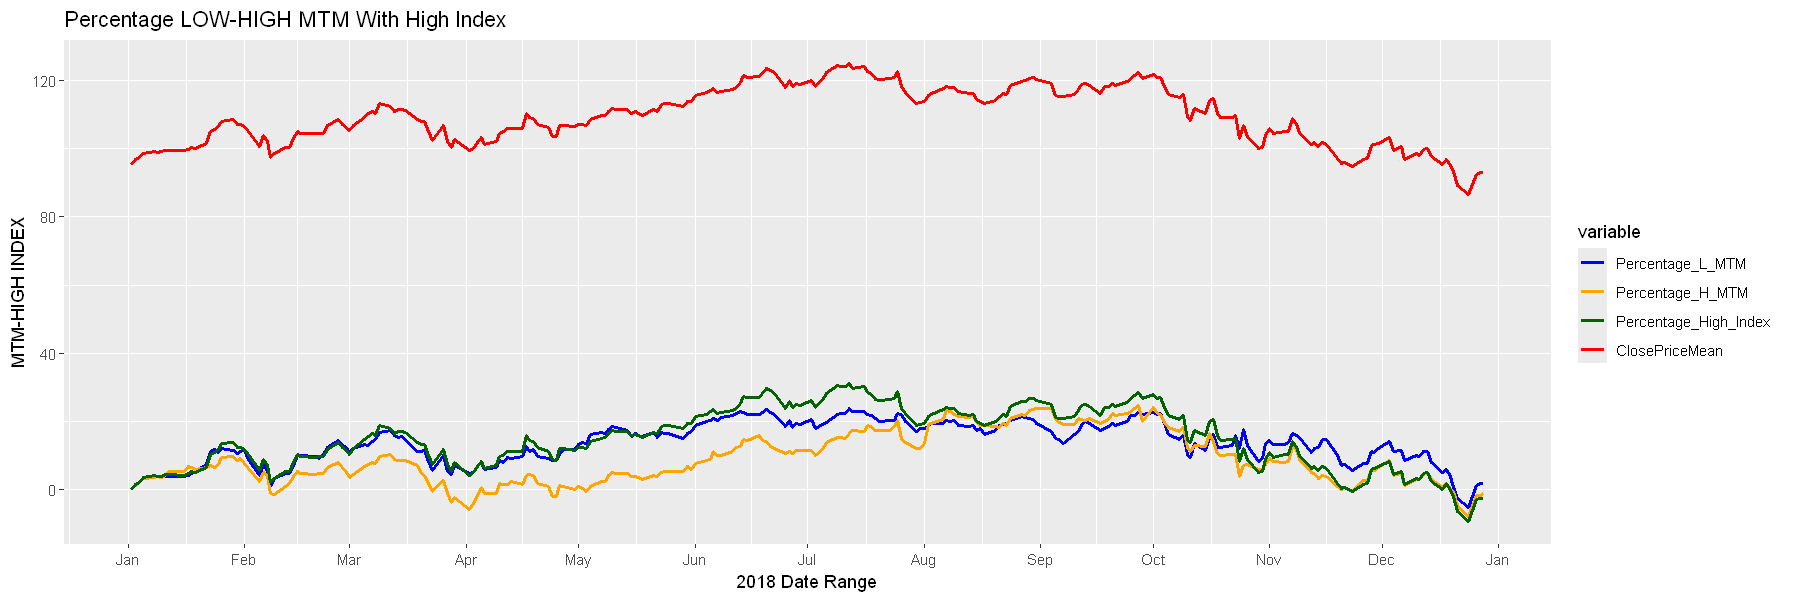

[1] "############"
[1] "2024-07-08 22:06:12 EDT"
[1] "Plotting the graph for MTM HIGH LIST,JPY MTM HIGH LIST  "
[1] "############"


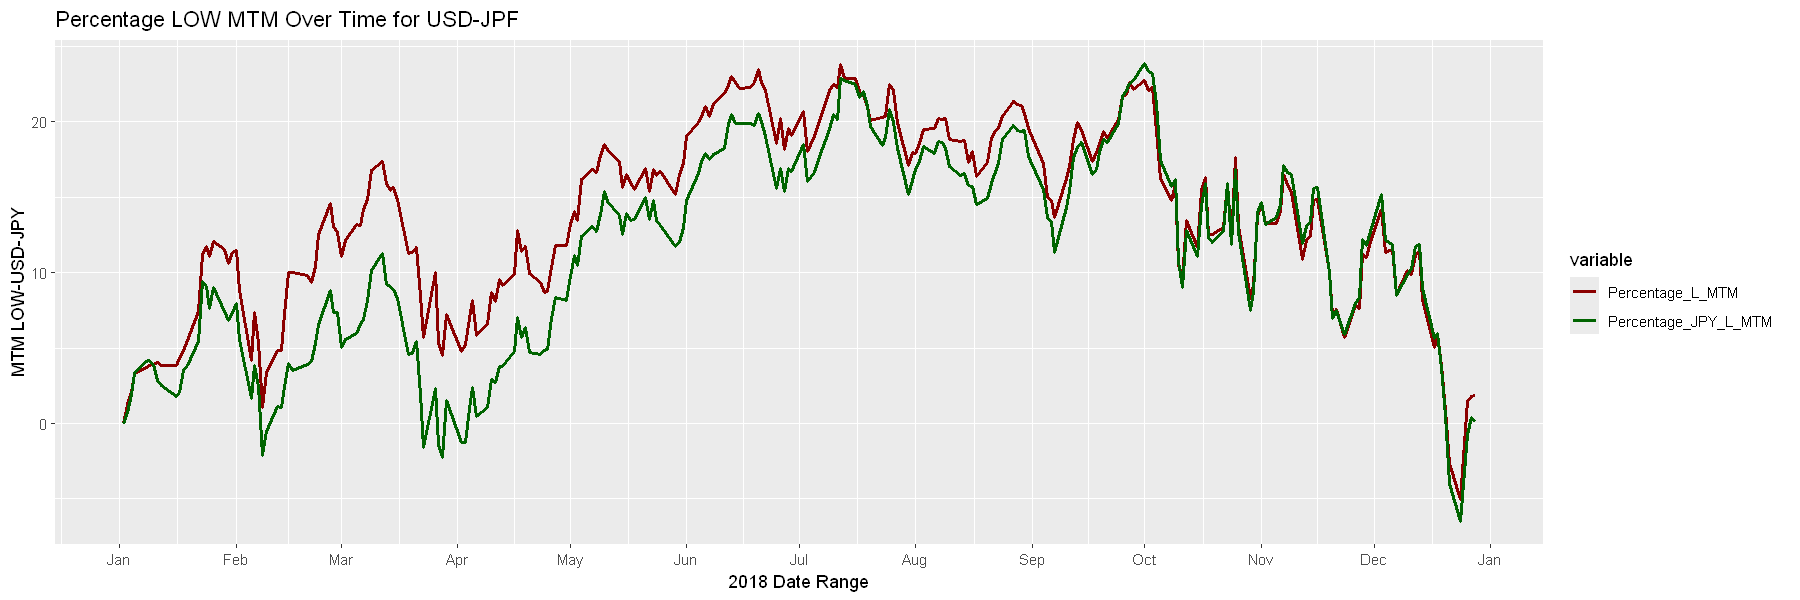

[1] "############ Logging Completed ################"


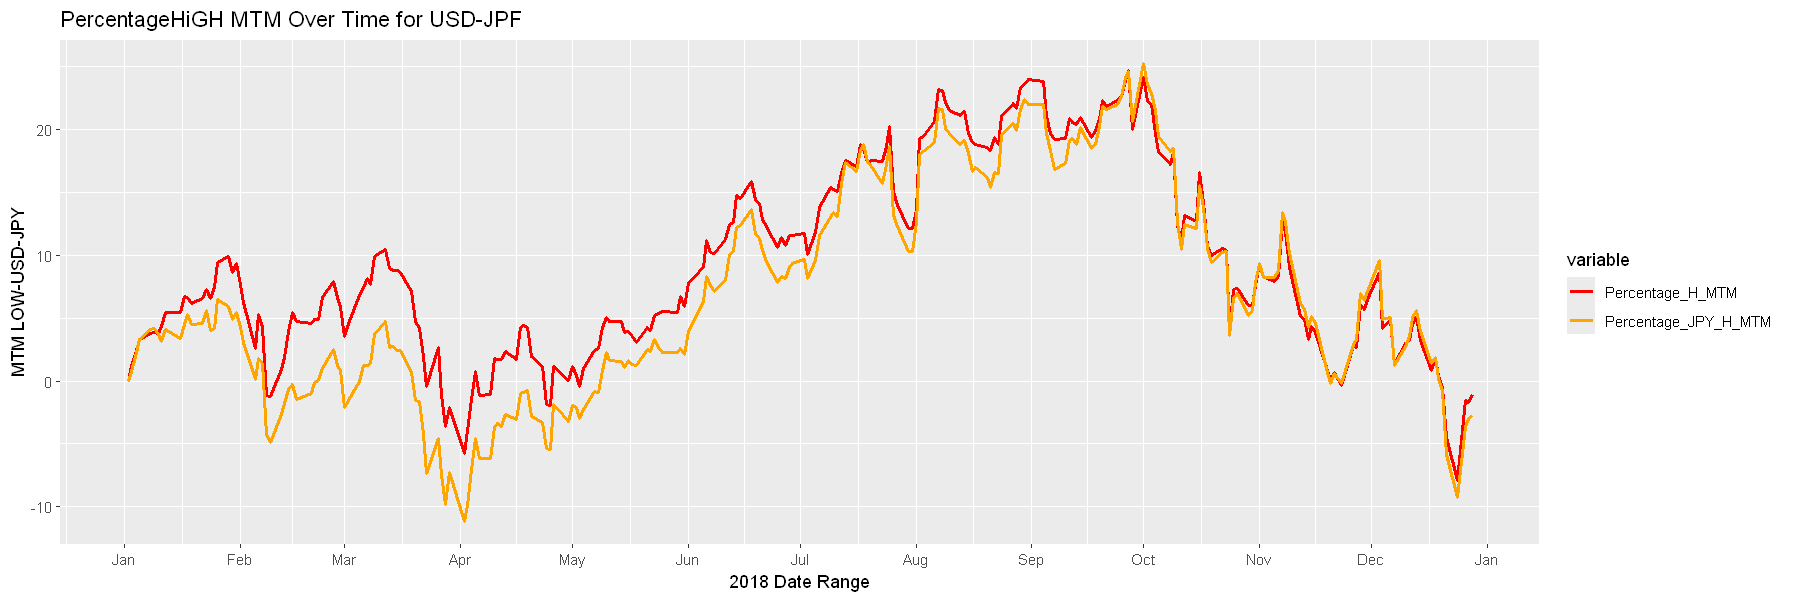

In [15]:
###plotting the graph

print("############")
print(Sys.time())
print("Plotting the graph for MTMLOW LIST, MTM HIGH LIST, AVG CLOSE LIST, PERCENTAGE HIGH INDEX ")
print("############")

# Plot the MTM series and high-tech index
                        
    Plo1 = Merged_L_H_MTM %>% select(Date,Percentage_L_MTM,Percentage_H_MTM,Percentage_High_Index,ClosePriceMean)
    Plo1 = reshape2::melt(Plo1, id.vars="Date", na.rm = T)
    ggplot(data.frame(Plo1),aes(x=as.Date(Date), y=value, group=variable, colour = variable)) + geom_line(size = 1) + 
    labs(title = "Percentage LOW-HIGH MTM With High Index ", x = "2018 Date Range", y = "MTM-HIGH INDEX") +
    scale_x_date(date_breaks = "1 month", date_labels = "%b") +   
    scale_color_manual(values = c("blue", "orange", "darkgreen","red"))

  
print("############")
print(Sys.time())
print("Plotting the graph for MTMLOW LIST, JPY MTMLOW LIST")
print("############")
# Plot the MTM series and high-tech index
    Plo2 = Merged_L_H_MTM %>% select(Date,Percentage_L_MTM,Percentage_JPY_L_MTM)
    Plo2 = reshape2::melt(Plo2, id.vars="Date", na.rm = T)
    ggplot(data.frame(Plo2),aes(x=as.Date(Date), y=value, group=variable, colour = variable)) + geom_line(size = 1) + 
    labs(title = "Percentage LOW MTM Over Time for USD-JPF ", x = "2018 Date Range", y = "MTM LOW-USD-JPY") +
    scale_x_date(date_breaks = "1 month", date_labels = "%b") +   
    scale_color_manual(values = c("darkred", "darkgreen"))
                                            
print("############")
print(Sys.time())
print("Plotting the graph for MTM HIGH LIST,JPY MTM HIGH LIST  ")
print("############")
# Plot the MTM series and high-tech index
    Plo3 = Merged_L_H_MTM %>% select(Date,Percentage_H_MTM,Percentage_JPY_H_MTM)
    Plo3 = reshape2::melt(Plo3, id.vars="Date", na.rm = T)
    ggplot(data.frame(Plo3),aes(x=as.Date(Date), y=value, group=variable, colour = variable)) + geom_line(size = 1) + 
    labs(title = "PercentageHiGH MTM Over Time for USD-JPF ", x = "2018 Date Range", y = "MTM LOW-USD-JPY") +
    scale_x_date(date_breaks = "1 month", date_labels = "%b") +   
    scale_color_manual(values = c("red", "orange"))
                                                    
                        
print("############ Logging Completed ################")                        




##   Function to Find optimal Day for Rebalancing for 1:30 days range following Low and high MTM strategy and plotting the graph

[1] "############ Logging Started for finding Optimal Day for Rebalancing for Interval Range 1:30 ################"
[1] "############"
[1] "2024-07-08 22:06:20 EDT"
[1] "Finding Optimal Day for rebalancing with day range from 1 to 30 "
[1] "############"
[1] "############"
[1] "2024-07-08 22:06:20 EDT"
[1] "Optimal Day to get High Profit by following LOW Strategy is "
[1] "############"


optimalDay,YearEnd_Net_Worth_LOW_MTM
<int>,<dbl>
10,5957323


[1] "############"
[1] "2024-07-08 22:07:54 EDT"
[1] "Optimal Day to get High Profit by following High Strategy is "
[1] "############"


optimalDay,YearEnd_Net_Worth_HIGH_MTM
<int>,<dbl>
7,5629000


,optimalDay,YearEnd_Net_Worth_LOW_MTM,YearEnd_Net_Worth_HIGH_MTM
,<int>,<dbl>,<dbl>
1,1,5024562,5024562
2,2,5501357,4635978
3,3,5197288,4872173
4,4,4690846,5373973
5,5,5091589,4948248
6,6,5354042,4711546


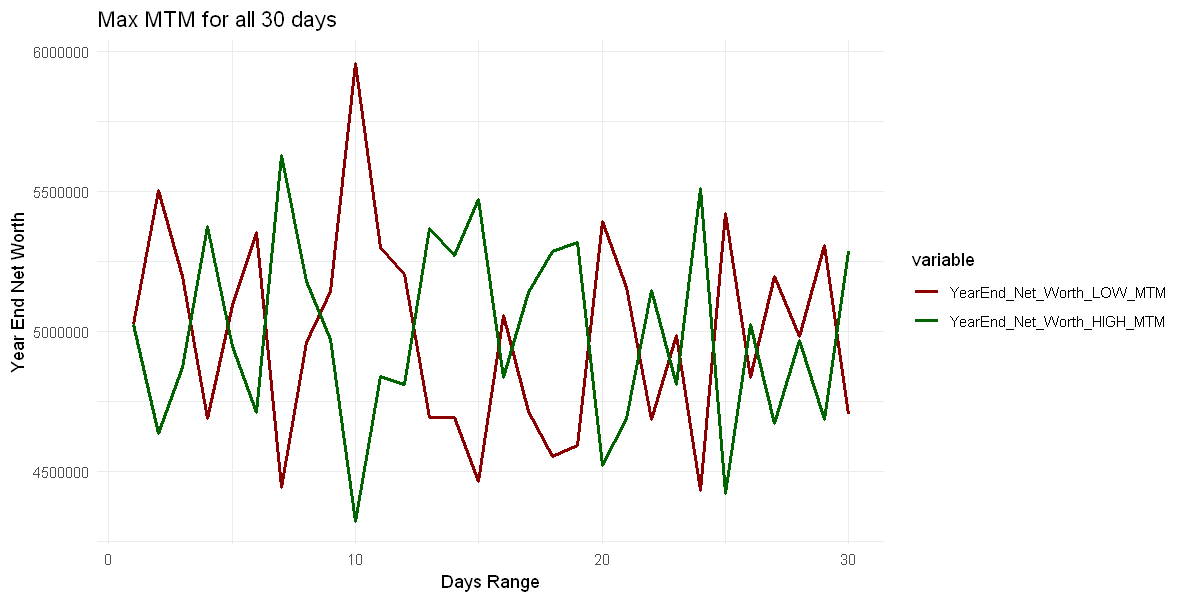

In [16]:

print("############ Logging Started for finding Optimal Day for Rebalancing for Interval Range 1:30 ################")                        
                        
print("############")
print(Sys.time())
print("Finding Optimal Day for rebalancing with day range from 1 to 30 ")
print("############")
                        
###To Find optimal Rebalance Day
Optimal_All_DataA = data.frame()                                             

find_OptimlDay_For_Rebalancing = function(Type){
    for (i in 1:30){
    LMTM =  Get_PortfolioDetails(Type,i)
    YearEnd_Net_Worth  = LMTM %>% group_by(Date) %>% summarize(YearEnd_Net_Worth=sum(NetWorthPerShare)) %>% filter(Date == as.Date("2018-12-28")) %>% select (YearEnd_Net_Worth)  
    Optimal_DF = data.frame(optimalDay=i , YearEnd_Net_Worth) 
    Optimal_All_DataA = rbind(Optimal_All_DataA,Optimal_DF)
    } 
    return(Optimal_All_DataA)                                             
}
print("############")
print(Sys.time())
print("Optimal Day to get High Profit by following LOW Strategy is ")
print("############")
                        
Optimal_Day_Low_MTM = find_OptimlDay_For_Rebalancing("Low")
Optimal_Day_Low_MTM <- Optimal_Day_Low_MTM %>% rename(YearEnd_Net_Worth_LOW_MTM = YearEnd_Net_Worth)
Max_Optimal_Day_Low_MTM = Optimal_Day_Low_MTM %>% arrange(desc(YearEnd_Net_Worth_LOW_MTM) , optimalDay) %>% select(optimalDay,YearEnd_Net_Worth_LOW_MTM) %>% slice(1)
Max_Optimal_Day_Low_MTM                        
print("############")
print(Sys.time())
print("Optimal Day to get High Profit by following High Strategy is ")
print("############")                        
Optimal_Day_High_MTM = find_OptimlDay_For_Rebalancing("High") 
Optimal_Day_High_MTM <- Optimal_Day_High_MTM %>% rename(YearEnd_Net_Worth_HIGH_MTM = YearEnd_Net_Worth)
Max_Optimal_Day_High_MTM = Optimal_Day_High_MTM %>% arrange(desc(YearEnd_Net_Worth_HIGH_MTM) , optimalDay) %>% select(optimalDay,YearEnd_Net_Worth_HIGH_MTM) %>% slice(1)
Max_Optimal_Day_High_MTM

Merged_OptimalDay_List = merge(Optimal_Day_Low_MTM, Optimal_Day_High_MTM, by = "optimalDay", all = TRUE)
head(Merged_OptimalDay_List)  

# Plot the Max MTM for all 30 days
options(repr.plot.width = 10, repr.plot.height = 5)
                        


Plo4 = reshape2::melt(Merged_OptimalDay_List, id.vars="optimalDay", na.rm = T)
ggplot(data.frame(Plo4),aes(x=optimalDay, y=value, group=variable, colour = variable)) + geom_line(size = 1) + 
labs(title = "Max MTM for all 30 days ", x = "Days Range", y = "Year End Net Worth") +
scale_color_manual(values = c("darkred", "darkgreen")) +     theme_minimal() 


##   Conclusion : 
######        We get Maximum MTM on 12/28/2018 if we rebalance the portfolio every 10 days with LOW Adj Close Strategy.
######        We get Maximum MTM on 12/28/2018 if we rebalance the portfolio every 7 days with HIGH Adj Close Strategy.
#####         So Comparing LOW and HIGH MTM, the best solution to get Maximum MTM on 12/28/2018 is by rebalancing the portfolio every 10 days with LOW Adj Close Strategy.